In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

> _SVMs are particularly well suited for classification of complex but **small- or medium**-sized
datasets._

**(?1)** Why small- and medium-sized datasets only? Why is it better to use DL for large-sized
dataset and how large does Mr. Geron mean by large?

**(?2)** Mr. Geron emphasized the importance of feature scaling before doing linear SVM.
In Figure 5-1, we do see that the lines seem to have different slopes,
but are they **_only so visually_** $\;$ or $\;$ **_numerically they are indeed of quite different slope values_**?

In [30]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

In [31]:
# decision boundary: wo*x0 + w1*x1 + b = 0, where
# w = svm_clf.coef_ and b = svm_clf.intercept_
svm_clf.coef_

array([[0.06896552, 0.17241379]])

In [32]:
svm_clf.intercept_

array([-9.68965517])

In [33]:
svm_clf.support_

array([0, 3], dtype=int32)

**(?3)** Is `support_` the distances from the support vectors (i.e. `support_vectors_`, cf. the next cell) to the decision boundary?

In [34]:
svm_clf.support_vectors_

array([[ 1., 50.],
       [ 5., 60.]])

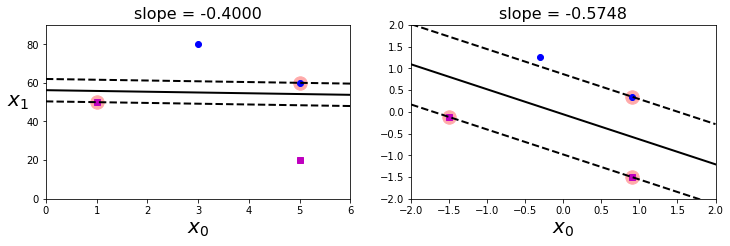

In [40]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
scaled_svm_clf = SVC(kernel="linear", C=100)
scaled_svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
#plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2]);

There is difference in the magnitude of the slopes before and after scaling.

Let's try to find a point
- which is classified safely as square magenta point on the left
- and which causes trouble by crossing the decision boundary towards the blue circular point territory on the right.

In [43]:
xA = 5.7
yA = Xs[0][1] + slope*(xA - Xs[0][0])
A = [xA, yA]
xB = 0.2
yB = Xs[-1][1] + slope*(xB - Xs[-1][0])
B = [xB, yB]
extra_data = np.array([A, B]).astype(np.float64)
extra_data

array([[ 5.7 , 48.12],
       [ 0.2 , 61.92]])

In [45]:
X_aug = np.vstack([Xs, extra_data])
X_aug

array([[ 1.  , 50.  ],
       [ 5.  , 20.  ],
       [ 3.  , 80.  ],
       [ 5.  , 60.  ],
       [ 5.7 , 48.12],
       [ 0.2 , 61.92]])

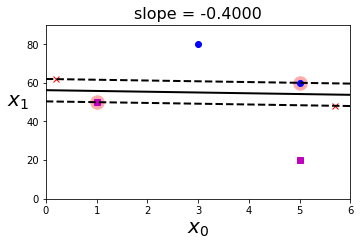

In [51]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

In [53]:
scaler.transform(X_aug)

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016],
       [ 1.32664992, -0.20230353],
       [-1.98997487,  0.43509116]])

In [54]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [59]:
scaler.transform(extra_data)

array([[ 1.32664992, -0.20230353],
       [-1.98997487,  0.43509116]])

In [56]:
scaler.transform([A])

array([[ 1.32664992, -0.20230353]])

In [57]:
scaler.transform([B])

array([[-1.98997487,  0.43509116]])

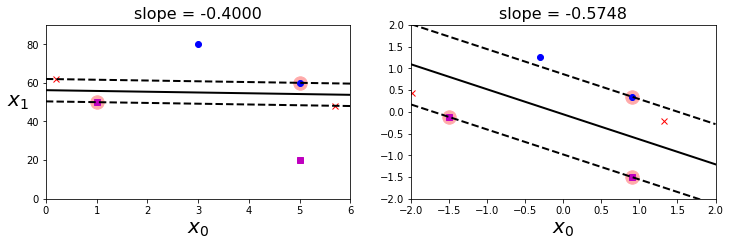

In [62]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
plt.plot(extra_data[:, 0], extra_data[:, 1], "rx")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

#A_scaled = scaler.transform([A])[0]
#B_scaled = scaler.transform([B])[0]
extra_data_scaled = scaler.transform(extra_data)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plt.plot(extra_data_scaled[:, 0], extra_data_scaled[:, 1], "rx")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);

Need to plot the points `A` and `B` separately in order to better see which points corresponds to which.

In [63]:
A_scaled = scaler.transform([A])[0]
A_scaled

array([ 1.32664992, -0.20230353])

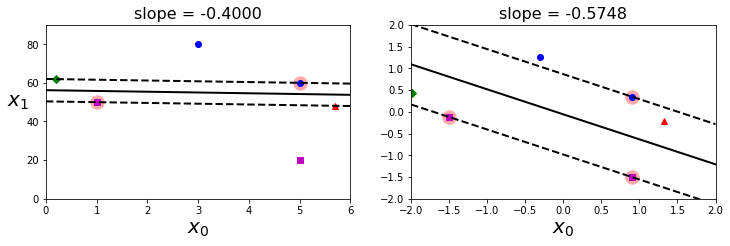

In [64]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
#plt.plot(extra_data[:, 0], extra_data[:, 1], "rx")
## See for more markers: ^ for triangle, D for diamond
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(xA, yA, "r^")
plt.plot(xB, yB, "gD")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

A_scaled = scaler.transform([A])[0]
B_scaled = scaler.transform([B])[0]
#extra_data_scaled = scaler.transform([B])[0]

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plt.plot(A_scaled[0], A_scaled[1], "r^")
plt.plot(B_scaled[0], B_scaled[1], "gD")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);